# plt and sns Lab solution

## <span style="color:red">**Warning:** Please avoid using ChatGPT in the lab.</span>


## Import needed libraries

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set()

## Import Data

In [3]:
df = pd.read_csv("Data/shopping_trends.csv")

##### Data source: https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset/data

### Understand the data well

In [5]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


# Answer the following questions with the right visualization

### Use the specified graph if asked
### Graph completeness (labels and titles) matters.

## 1. what is the percentage of each gender in shopping 

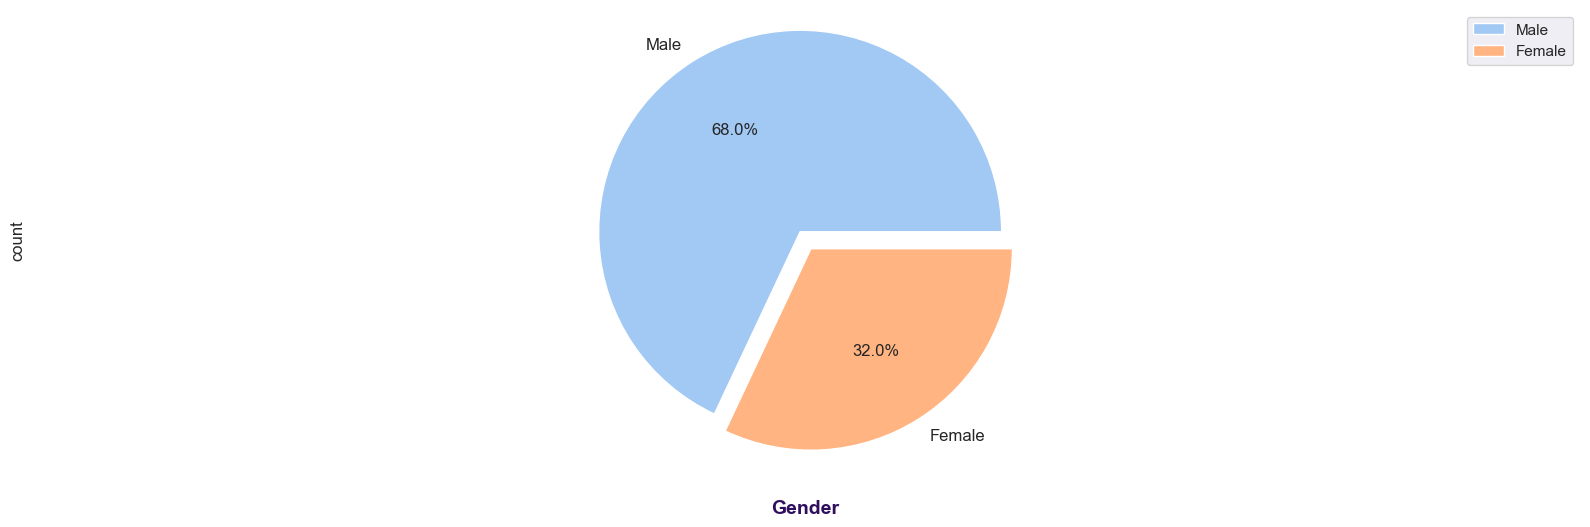

In [76]:
plt.figure(figsize = (20, 6))

counts = df["Gender"].value_counts()
explode = (0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = sns.color_palette('pastel'), explode = explode, autopct = '%1.1f%%')
plt.xlabel('Gender', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

## 2. What is the distribution of age given gender (in one graph)

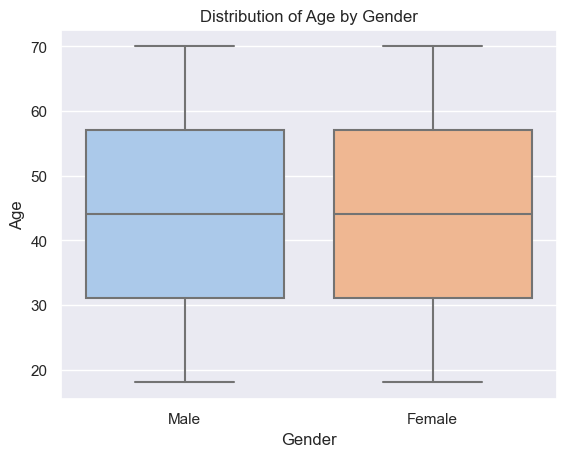

In [50]:
sns.boxplot(x='Gender', y='Age', data=df,palette = 'pastel')
plt.title('Distribution of Age by Gender')
plt.show()

## 3. How many items in each Category were purchased?

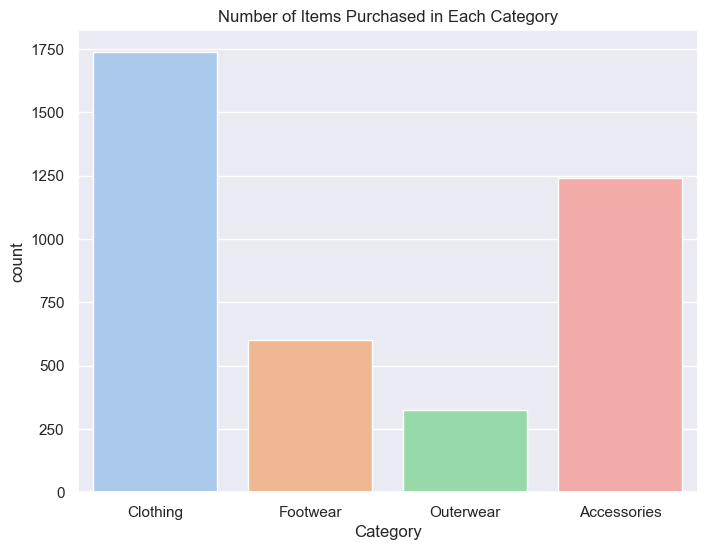

In [49]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Category', data=df, palette='pastel')
plt.title('Number of Items Purchased in Each Category')
plt.show()

## 4. What is the percentage of each item size purchased?

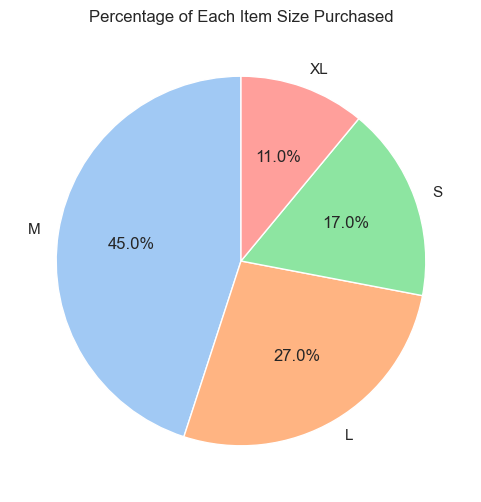

In [75]:
total_items = len(df['Size'])
size_counts = df['Size'].value_counts()

plt.figure(figsize = (20, 6))
colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE"]  
plt.pie(size_counts, labels=size_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=90)
plt.title('Percentage of Each Item Size Purchased')
plt.show()

## 5. What is the distribution of purchase amount per gender? (Use boxplot)

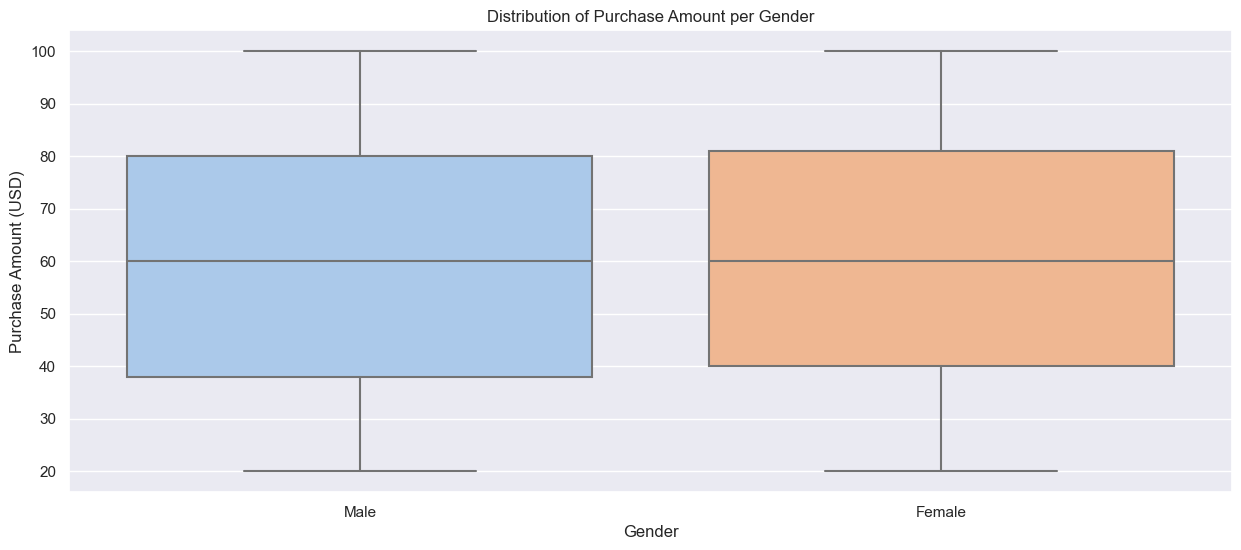

In [46]:
plt.figure(figsize = (15, 6))
sns.boxplot(x='Gender', y='Purchase Amount (USD)', data=df, palette='pastel')
plt.title('Distribution of Purchase Amount per Gender')
plt.show()

## 6. What is the ubscription Status by Gender? (use grouped column chart)

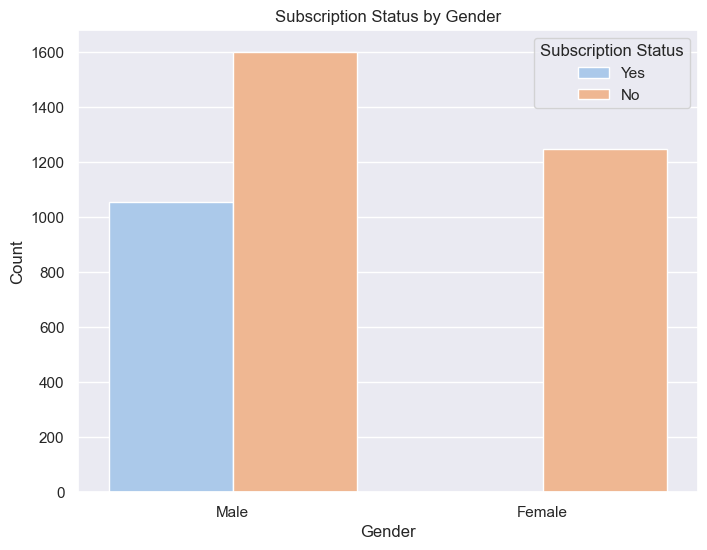

In [45]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Subscription Status', data=df, palette='pastel')
plt.title('Subscription Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

## 7. What is wrong with the following graph? fix it.

### Answer:

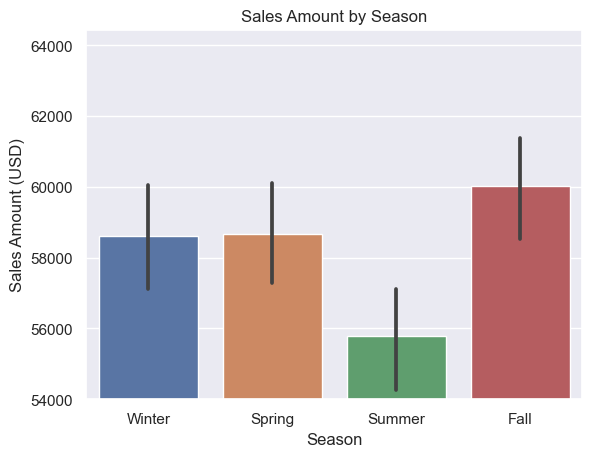

In [85]:
#The following graph is wrong because the y-axis is not properly scaled.
#The lower limit of the y-axis should be 0 instead of 54000.

sns.barplot(data=df, x='Season', y='Purchase Amount (USD)', estimator="sum")
plt.ylim(54000,)
plt.title('Sales Amount by Season')
plt.xlabel('Season')
plt.ylabel('Sales Amount (USD)')
plt.show()

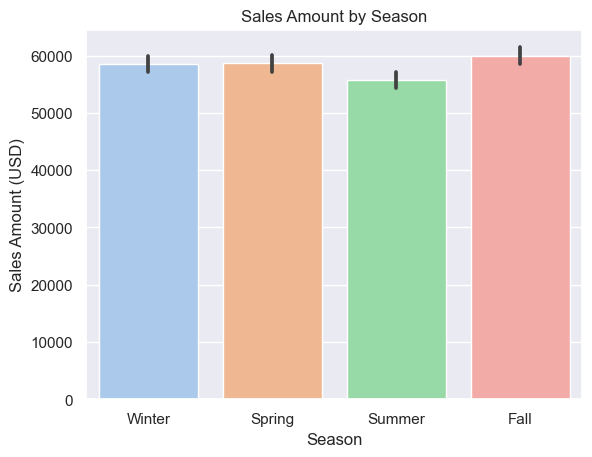

In [87]:
sns.barplot(data=df, x='Season', y='Purchase Amount (USD)', estimator="sum",palette = 'pastel')
plt.ylim(0,) # Change the lower limit to 0
plt.title('Sales Amount by Season')
plt.xlabel('Season')
plt.ylabel('Sales Amount (USD)')
plt.show()



### 8.What is the distribution of Purchase Amount by Season? (Use KDE)

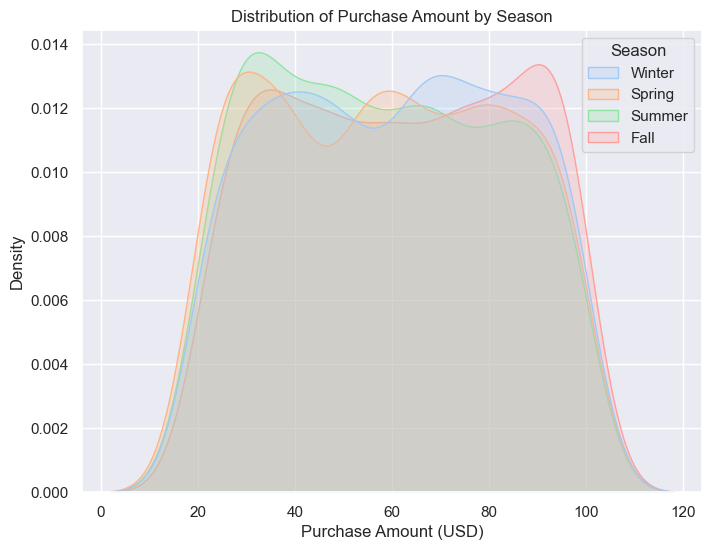

In [60]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='Purchase Amount (USD)', hue='Season', fill=True, common_norm=False, palette='pastel')
plt.title('Distribution of Purchase Amount by Season')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Density')
plt.show()

### 9. Which payment method performs the best? 

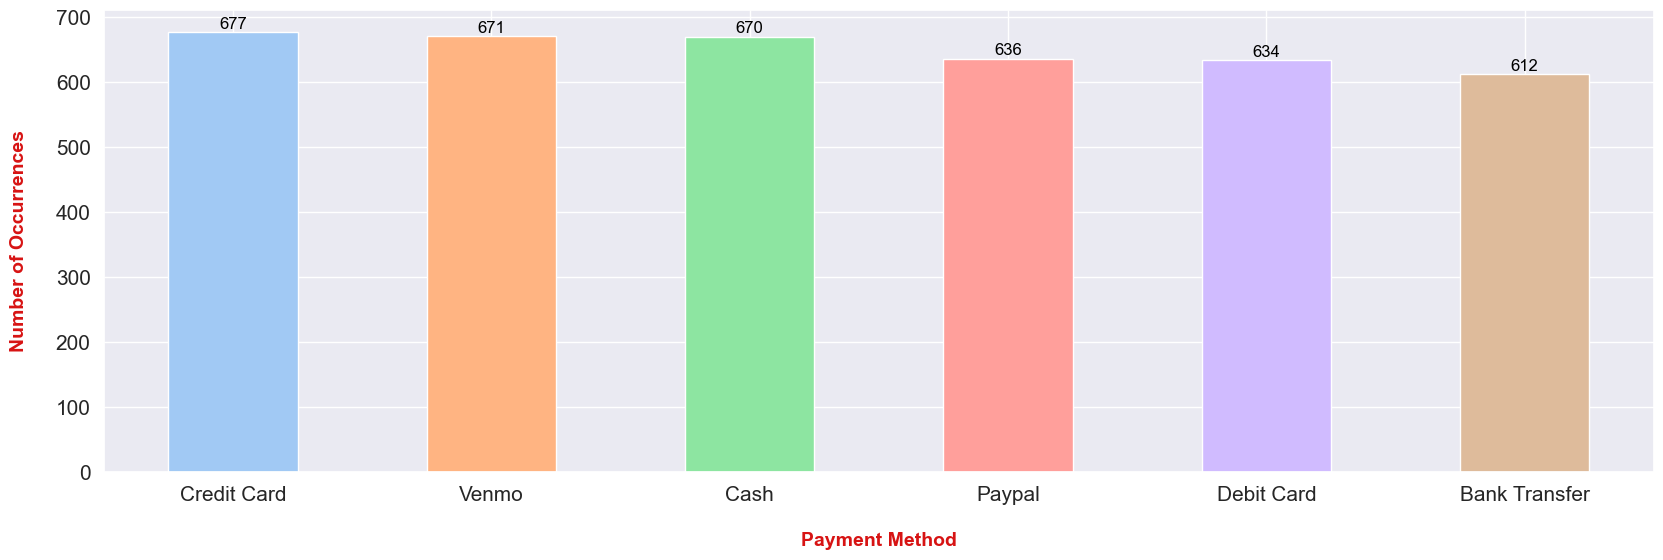

In [74]:
plt.figure(figsize = (20, 6))
ax = df["Payment Method"].value_counts().plot(kind = 'bar', color = sns.color_palette('pastel'), rot = 0)
ax.set_xticklabels(('Credit Card', 'Venmo', 'Cash', 'Paypal', 'Debit Card', 'Bank Transfer'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
    
plt.xlabel('Payment Method', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);
plt.show()

### 10. What is the top 10 items purchased?

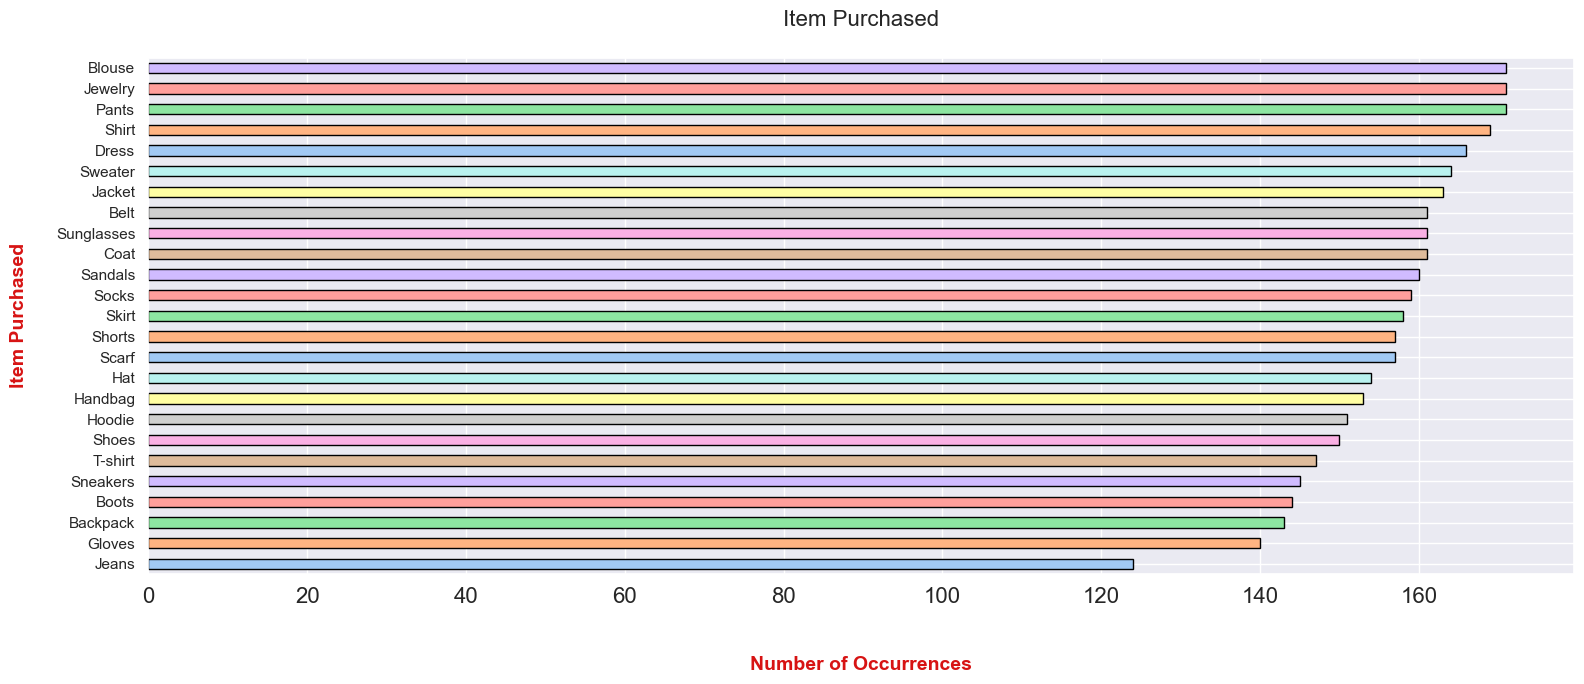

In [78]:
plt.figure(figsize = (16, 7))
df["Item Purchased"].value_counts().sort_values(ascending = True).plot(kind = 'barh', color = sns.color_palette('pastel'), edgecolor = 'black')
plt.ylabel('Item Purchased', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.xlabel('\nNumber of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.title('Item Purchased\n', fontsize = 16)
plt.xticks(rotation = 0, ha = 'center', fontsize = 16)
plt.tight_layout()
plt.show()

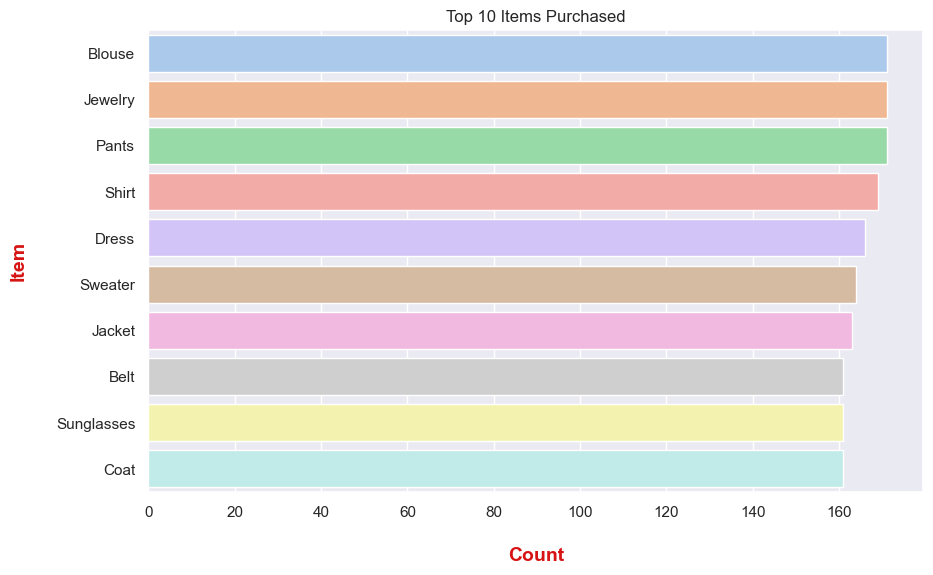

In [79]:
top_10_items = df['Item Purchased'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_items.values, y=top_10_items.index, palette='pastel')
plt.title('Top 10 Items Purchased')
plt.xlabel('Count',weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Item',weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.show()

### 11. Does offering free shipping affect number of sales?

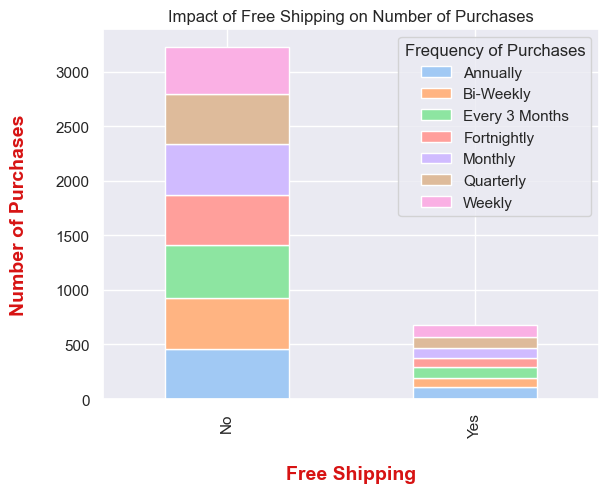

In [95]:
df["Free Shipping"] = df["Shipping Type"].apply(lambda x: "Yes" if x == "Free Shipping" else "No")

pastel_palette = sns.color_palette("pastel")

fig, ax = plt.subplots()

df.groupby("Free Shipping")["Frequency of Purchases"] \
    .value_counts().unstack().plot(kind="bar", stacked=True, ax=ax, color=pastel_palette)

ax.set_xlabel("Free Shipping",weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
ax.set_ylabel("Number of Purchases",weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
ax.set_title("Impact of Free Shipping on Number of Purchases")

plt.show()